In [80]:
import gym
from nle import nethack

import minihack
from minihack.tiles.rendering import get_des_file_rendering, get_image

import numpy as np
import time

import matplotlib.pyplot as plt

import IPython.display
from IPython.display import clear_output, display, Image

from PIL import Image # not used ?
import imageio


import copy
#################
def printMessage(msg_array):
    msg = ""
    for letter in msg_array:
        if letter != 0:
            msg += chr(letter)
    print(msg)
    return msg

def show_env(obs, fullScreen=True, show = True):
    img = get_image(obs['pixel'], full_screen=fullScreen, resize=None, relative=False)
    if show:
        plt.figure(figsize=(15, 4))
        plt.imshow(img) 
        plt.show()
    return img


def create_gif(GIF_imgs):
    # duration is the number of milliseconds between frames; this is 40 frames per second
    print("Saving GIF file")
    with imageio.get_writer("quest_test.gif", mode="I") as writer:
        for idx, frame in enumerate(GIF_imgs):
            print("Adding frame to GIF file: ", idx + 1)
            writer.append_data(np.array(frame))

def getLoc(obs):
    rows, cols = obs['chars'].shape
    for x in range(rows):
        for y in range(cols):
            if obs['chars'][x][y] == 64:
                return (x,y)

def getPos(obs_chars):
    find_agent = np.where(obs_chars == 64, 64, 0)
    zero_rest = np.nonzero(find_agent)
    x = zero_rest[0][0]
    y = zero_rest[1][0]
    return x,y

def cal_dist_to_door(yx):
    term1 = (yx[0]-maze_door[0])**2
    term2 = (yx[1]-maze_door[1])**2
    dist = np.sqrt(term1 + term2)
    return dist

def dist_to_maze_door(env, prev_obs, action, next_obs):
    #r = list(obs.items())
    #print(r[2][1])
    
    global prev_dist
    
    #nxt = list(next_obs.items())
    curr_yx = getPos(next_obs[env._observation_keys.index('chars')])
    
    curr_dist = cal_dist_to_door(curr_yx)
    print("Prev Dist: {} Curr Dist: {}".format(prev_dist, curr_dist))
    
    # Stops rewarding agent once it passes the first door
    if curr_yx[1] > maze_door[1]: 
        return 0
    
    reward = -999
    
    if curr_dist <= prev_dist: # if agent is closer to door give a positive reward
        reward = 0.2
        prev_dist = curr_dist
    
    if curr_dist > prev_dist: # if agent is further from door give a negitive reward
        reward = -0.05
    
    if curr_yx == maze_door:
        reward = 0.3
    
    return reward



############
rwd_manager = minihack.RewardManager()
rwd_manager.add_coordinate_event((29, 11), 
                                 reward=0.1, 
                                 repeatable=False, 
                                 terminal_required=True) # pass the first door

rwd_manager.add_coordinate_event((39, 11), 
                                 reward=0.1, 
                                 repeatable=False, 
                                 terminal_required=True) # pass the second door

rwd_manager.add_coordinate_event((54, 11), 
                                 reward=0.1, 
                                 repeatable=False, 
                                 terminal_required=True) # pass the lava

rwd_manager.add_coordinate_event((72, 0), 
                                 reward=0.1, 
                                 repeatable=False, 
                                 terminal_required=True) # 

rwd_manager.add_kill_event("minotaur", 
                           reward=0.2, 
                           repeatable=False, 
                           terminal_required=False)

rwd_manager.add_wear_event("levitation", 
                           reward=0.1, 
                           terminal_required=False)

rwd_manager.add_wear_event("levitation boots", 
                           reward=0.1, 
                           terminal_required=False)

rwd_manager.add_custom_reward_fn(dist_to_maze_door)

ACTIONS = (
    nethack.CompassDirection.N, # k
    nethack.CompassDirection.E, # l
    nethack.CompassDirection.S, # j
    nethack.CompassDirection.W, # h
    nethack.Command.PICKUP,      # pick up things at the current location - ,
    nethack.Command.ZAP,         # zap a wand - z
    nethack.Command.FIRE,        # fire ammunition from quiver - f
    nethack.Command.RUSH,        # g
    nethack.Command.APPLY,       # a apply (use) a tool (pick-axe, key, lamp, HORN...)
    nethack.Command.WEAR,        # W wear a piece of armor or RING or LEVITATION BOOTS 
    nethack.Command.REMOVE,      # R remove an accessory (RING, amulet, LEVITATION BOOTS, etc)
    nethack.MiscDirection.UP,    # < go up a staircase
    nethack.MiscDirection.DOWN,  # > go down a staircase or stop levitating
    nethack.Command.QUAFF,       # q quaff (drink) something (potion)
    nethack.Command.OPEN,        # o Used to Open Doors
    nethack.CompassIntercardinalDirection.SE, # Also n
    nethack.CompassIntercardinalDirection.NW, # Also y
) + tuple(nethack.CompassDirectionLonger)

action_chars = ['k','l','j','h',',','z','f','g','a','W','R','<','>','q','o','n','y','K','L','J','H','U','N','B','Y']

env = gym.make(
    "MiniHack-Quest-Hard-v0",
    actions = ACTIONS,
    observation_keys = ("glyphs", "blstats", "chars", "pixel", "message",),
    reward_win = 1,
    reward_lose = -1,
    reward_manager = rwd_manager,
    max_episode_steps = 1000,
)

GIF_imgs = []
obs = env.reset()

prev_dist = 100
maze_door = (11, 27)
done = False

selected move: 0
Prev Dist: 9.219544457292887 Curr Dist: 25.079872407968907
Reward: -0.05


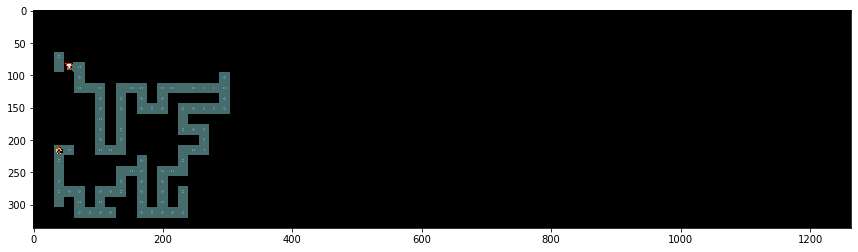

Maze Door: (11, 27)
Agent Pos: (13, 2)



KeyboardInterrupt: 

In [79]:
show_env(obs, fullScreen = True)
while done != True:

    move = int(input())
    if move not in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]:
        continue 
        
    clear_output(wait=True)
    
    print("selected move: {}".format(move))
    
    obs, reward, done, info = env.step(move)
    
    print("Reward: {}".format(reward))
    
    GIF_imgs.append(show_env(obs, fullScreen = True))
    
    print("Maze Door: {}".format(maze_door))
    print("Agent Pos: {}".format(getPos(obs["chars"])))
    
    #test_rew = dist_to_maze_door(env, prev_obs, move, obs)
    #print("New Reward is: {}".format(test_rew))

    printMessage(obs["message"])
    
    
    if done == True:
        printMessage(obs["message"])
        obs = env.reset()
        time.sleep(0.01)
        create_gif(GIF_imgs)
        break

In [ ]:
#action_chars = ['k','l','j','h',',','z','g','a','W','R','<','>','q','o','n','y','K','L','J','H','U','N','B','Y','kk']
for idx,action in enumerate(ACTIONS):
    print("{:2} : {}   {}".format(idx, action_chars[idx], action.name))


In [88]:
import gc
import torch

torch.cuda.empty_cache()
gc.collect()

20

In [84]:
import torch
from stable_baselines3 import A2C
import gc

torch.cuda.empty_cache()
gc.collect()

env.reset()

model = A2C("MultiInputPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Prev Dist: 100 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 26.248809496813376
Prev Dist: 25.298221281347036 Curr Dist: 26.248809496813376
Prev Dist: 25.298221281347036 Curr Dist: 26.248809496813376
Prev Dist: 25.298221281347036 Curr Dist: 26.248809496813376
Prev Dist: 25.298221281347036 Curr Dist: 26.248809496813376
Prev Dist: 25.298221281347036 Curr Dist

Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 25.298221281347036
Prev Dist: 25.298221281347036 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist:

Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist:

Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist:

Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist: 24.351591323771842
Prev Dist: 24.351591323771842 Curr Dist:

Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist: 25.298221281347036
Prev Dist: 24.351591323771842 Curr Dist:

Prev Dist: 4.123105625617661 Curr Dist: 8.06225774829855
Prev Dist: 4.123105625617661 Curr Dist: 8.06225774829855
Prev Dist: 4.123105625617661 Curr Dist: 8.06225774829855
Prev Dist: 4.123105625617661 Curr Dist: 8.06225774829855
Prev Dist: 4.123105625617661 Curr Dist: 8.06225774829855
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.72004514666935
Prev Dist: 4.123105625617661 Curr Dist: 17.72004514666935
Prev Dist: 4.123105625617661 Curr Dist: 17.72004514666935
Prev Dist: 4.123105625617661 Curr Dist: 17.72004514666935
Prev Dist: 4.123105625617661 Curr Dist: 17.72004514666935
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105

Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.4950975679639

Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 25.709920264364882
Prev Dist: 4.123105625617661 Curr Dist: 25.709920264364882
Prev Dist: 4.123105625617661 Curr Dist: 25.709920264364882
Prev Dist: 4.123105625617661 Curr Dist: 25.709920264364882
Prev Dist: 4.123105625617661 Curr Dist: 25.495097567963924
Prev Dist: 4.123105625617661 Curr Dist: 23.08679276123039
Prev Dist: 4.123105625617661 Curr Dist: 23.08679276123039
Prev Dist: 4.123105625617661 Curr Dist: 23.08679276123039
Prev Dist: 4.123105625617661 Curr Dist: 23.08679276123039
Prev Dist: 4.123105625617661 Curr Dist: 23.08679276123039
Prev Dist: 4.123105625617661 Curr Dist: 24.08318915758459
Prev Dist: 4.123105625617661 Curr Dist: 19.1049731745428
Prev Dist: 4.123105625617661 Curr Dist: 19.1049731745428
Prev Dist: 4.123105625617661 Curr Dist: 19.1049731745428
Prev Dist: 4.123105625617661 Curr Dist: 19.1049731745428
Prev Dist: 4.123105625617661 Curr Dist: 19.1049731745428
Prev Dist: 4.

Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist:

Prev Dist: 4.123105625617661 Curr Dist: 22.80350850198276
Prev Dist: 4.123105625617661 Curr Dist: 22.80350850198276
Prev Dist: 4.123105625617661 Curr Dist: 22.80350850198276
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 21.840329667841555
Prev Dist: 4.123105625617661 Curr Dist: 21.840329667841555
Prev Dist: 4.123105625617661 Curr Dist: 22.80350850198276
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 25.0
Prev Dist: 4.123105625617661 Curr Dist: 24.0
Prev Dis

Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 24.73863375370596
Prev Dist: 4.123105625617661 Curr Dist: 25.709920264364882
Prev Dist: 4.123105625617661 Curr Dist: 25.709920264364882
Prev Dist: 4

Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 25.298221281347036
Prev Dist: 4.123105625617661 Curr Dist: 25.298221281347036
Prev Dist: 4.123105625617661 Curr Dist: 24.351591323771842
Prev Dist: 4.123105625617661 Curr Dist: 24.351591323771842
Prev Dist: 4.123105625617661 Curr Dist: 16.15549442140351
Prev Dist: 4.123105625617661 Curr Dist: 16.15549442140351
Prev Dist: 4.123105625617661 Curr Dist: 16.15549442140351
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev Dist: 4.123105625617661 Curr Dist: 17.46424919657298
Prev 

Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 13.601470508735444
Prev Dist: 4.123105625617661 Curr Dist: 13.601470508735444
Prev Dist: 4.123105625617661 Curr Dist: 13.601470508735444
Prev Dist: 4.123105625617661 Curr Dist: 13.601470508735444
Prev Dist: 4.123105625617661 Curr Dist: 13.601470508735444
Prev Dist: 4.123105625617661 Curr Dist: 13.601470508735444
Prev Dis

Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
Prev Dist: 4.123105625617661 Curr Dist: 49.64876634922564
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | 15.4     |
| time/                 |          |
|  

Prev Dist: 4.123105625617661 Curr Dist: 21.840329667841555
Prev Dist: 4.123105625617661 Curr Dist: 21.37755832643195
Prev Dist: 4.123105625617661 Curr Dist: 21.37755832643195
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 22.360679774997898
Prev Dist: 4.123105625617661 Curr Dist: 22.360679774997898
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496

Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.6155281280883

Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 19.0
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Prev Dist: 4.123105625617661 Curr Dist: 23.345235059857504
Pr

Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 4.123105625617661 Curr Dist: 21.02379604162864
Prev Dist: 

Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 19.4164878389476
Prev Dist: 4.123105625617661 Curr Dist: 26.248809496813376
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.

Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.095023109728988
Prev Dist: 4.123105625617661 Curr Dist: 21.0237960416286

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | -9.2     |
| time/                 |          |
|    fps                | 25       |
|    iterations         | 600      |
|    time_elapsed       | 118      |
|    total_timesteps    | 3000     |
| train/                |          |
|    entropy_loss       | -2.29    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 599      |
|    policy_loss        | 0.011    |
|    value_loss         | 3.64e-05 |
------------------------------------
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.1231

Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.264337522473747
Prev Dist: 4.123105625617661 Curr Dist: 15.2643375224737

Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.924858845171276
Prev Dist: 4.123105625617661 Curr Dist: 19.924858845171276
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 19.6977156035922

Prev Dist: 4.123105625617661 Curr Dist: 19.924858845171276
Prev Dist: 4.123105625617661 Curr Dist: 19.924858845171276
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 18.027756377319946
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.924858845171276
Prev Dist: 4.123105625617661 Curr Dist: 18.973665961010276
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.615528128088304
Prev Dist: 4.123105625617661 Curr Dist: 20.6155281280883

Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.697715603592208
Prev Dist: 4.123105625617661 Curr Dist: 19.6977156035922

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:


obs = env.reset()
GIF_imgs = []
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(action)
    printMessage(obs["message"])
    print("Reward: {}".format(reward))
    time.sleep(0.1)

    GIF_imgs.append(show_env(obs, fullScreen = True))
    if done:
        printMessage(obs["message"])
        obs = env.reset()
        time.sleep(0.01)
        break

    #clear_output(wait=True)

In [ ]:
!pip install GPUtil

In [ ]:


import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()   

In [ ]:
x, y = obs['chars'].shape

In [ ]:
type(x)
type(y)

In [ ]:
obs, reward, terminated, info = env.step(0)
#observation_space.sample()

In [ ]:
obs['chars']

In [ ]:
test = env.step(0)

In [ ]:
find_agent = np.where(obs['chars'] == 64, 64, 0)
zero_rest = np.nonzero(find_agent)
x = zero_rest[0][0]
y = zero_rest[1][0]
print(x,y)
obs['chars'][x][y]

In [ ]:
print(x)
print(y)

In [ ]:
def dist_to_maze_door(env, prev_obs, action, next_obs):
    maze_door = (27, 11)

        #print(x,y)
        #obs['chars'][x][y]
        # finds agent location
        #rows, cols = obs['chars'].shape 
        rows = int(21)
        cols = int(79)
        for x in range(rows):
            for y in range(cols):
                print(x,y)
                if obs["chars"][x][y] == 64:
                    return tuple(y,x)
    
    def cal_dist_to_door(yx):
        term1 = (yx[0]-maze_door[0])**2
        term2 = (yx[1]-maze_door[1])**2
        dist = np.sqrt(term1 + term2)
        return dist
    
    
    curr_yx = getPos(next_obs)
    
    # Stops rewarding agent once it passes the first door
    if curr_yx[0] > maze_door[0]: 
        return 0
    
    prev_yx = getPos(prev_obs)
    prev_dist = cal_dist_to_door(prev_yx)
    curr_dist = cal_dist_to_door(curr_yx)
    
    reward = 999
    
    if curr_dist < prev_dist: # if agent is closer to door give a positive reward
        reward = 0.2
    if curr_dist > prev_dist: # if agent is further from door give a negitive reward
        reward = -0.2
    
    return reward


In [ ]:
def getPos(obs):
    find_agent = np.where(obs['chars'] == 64, 64, 0)
    zero_rest = np.nonzero(find_agent)
    x = zero_rest[0][0]
    y = zero_rest[1][0]
    return x,y

def dist_to_maze_door(env, prev_obs, action, next_obs):
    maze_door = (27, 11)
 
    def getPos(obs):    
        rows = int(21)
        cols = int(79)
        for x in range(rows):
            for y in range(cols):
                print(x,y)
                if obs["chars"][x][y] == 64:
                    return tuple(y,x)
    
    def cal_dist_to_door(yx):
        term1 = (yx[0]-maze_door[0])**2
        term2 = (yx[1]-maze_door[1])**2
        dist = np.sqrt(term1 + term2)
        return dist
    
    
    curr_yx = getPos(next_obs)
    
    # Stops rewarding agent once it passes the first door
    if curr_yx[0] > maze_door[0]: 
        return 0
    
    prev_yx = getPos(prev_obs)
    prev_dist = cal_dist_to_door(prev_yx)
    curr_dist = cal_dist_to_door(curr_yx)
    
    reward = 999
    
    if curr_dist < prev_dist: # if agent is closer to door give a positive reward
        reward = 0.2
    if curr_dist > prev_dist: # if agent is further from door give a negitive reward
        reward = -0.2
    
    return reward


In [ ]:
print(nethack.NLE_BL_X)
print(nethack.NLE_BL_Y)

In [89]:
1e-2

0.01